# Задача выделения сообществ и метрики оценки качества

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
* Дополнительные источники:
   * https://arxiv.org/pdf/0906.0612.pdf

## Вопросы для совместного обсуждения

1\. Обсудите основные метрики для оценки качества выделенных сообществ и способы их вычисления.

In [ ]:
import networkx as nx

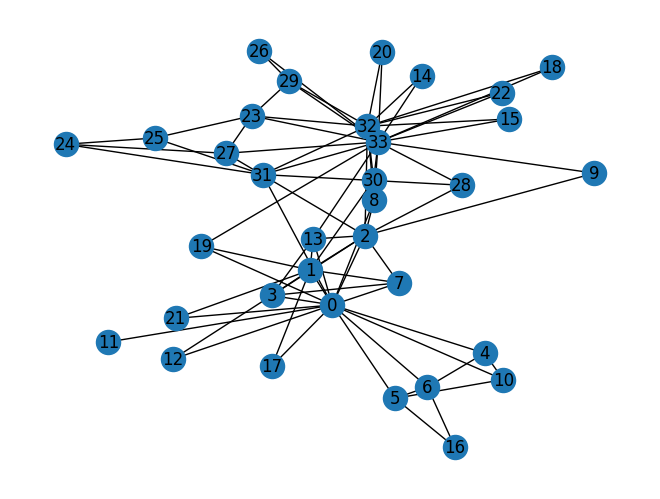

In [ ]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

In [ ]:
mr_hi = {n for n, club in G.nodes(data="club") if club == "Mr. Hi"}
officer = set(G) - mr_hi

In [ ]:
G_hi = G.subgraph(mr_hi)
G_officer = G.subgraph(officer)
nx.density(G_hi), nx.density(G_officer)

(0.25735294117647056, 0.23529411764705882)

In [ ]:
nx.community.modularity(G, [mr_hi, officer])

0.39143756676224206

In [ ]:
nx.community.partition_quality(G, [mr_hi, officer])

(0.8589743589743589, 0.6149732620320856)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите сеть `Southern women` с сайта http://konect.cc/, удалите из него петли и создайте не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Для создания разбиений не используйте специализированные алгоритмы. Визуализируйте графы, раскрасив узлы в цвет соответствующего им сообщества.

- [X] Проверено на семинаре

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
'/content/out.opsahl-southernwomen'

In [2]:
G = nx.read_adjlist('/content/out.opsahl-southernwomen', nodetype=int, comments='%')


In [3]:
G.remove_edges_from(nx.selfloop_edges(G))

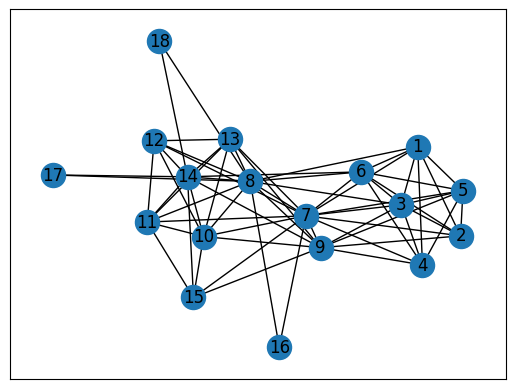

In [4]:
nx.draw_networkx(G)

In [5]:
def viz(s1, s2, G):
  plt.figure(figsize=(5, 5))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, nodelist=s1, node_color='r')
  nx.draw_networkx_nodes(G, pos, nodelist=s2, node_color='b')
  nx.draw_networkx_edges(G, pos)
  plt.show()

In [6]:
s1 = [i for i in range(1, 16)]
s2 = [16, 17, 18]

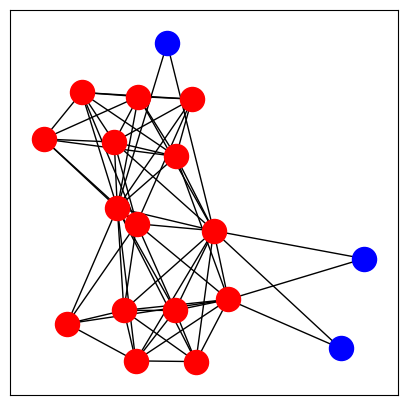

In [7]:
viz(s1,s2,G)

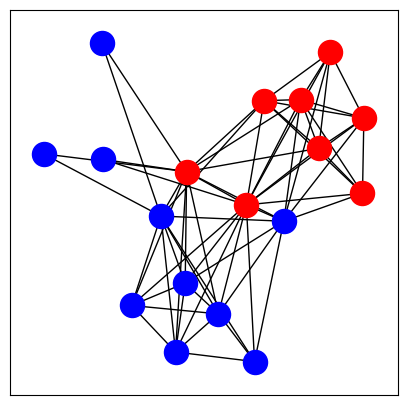

In [8]:
rand1_1 = [i for i in range(1, 9)]
rand1_2 = [i for i in range(9, 19)]
viz(rand1_1,rand1_2,G)

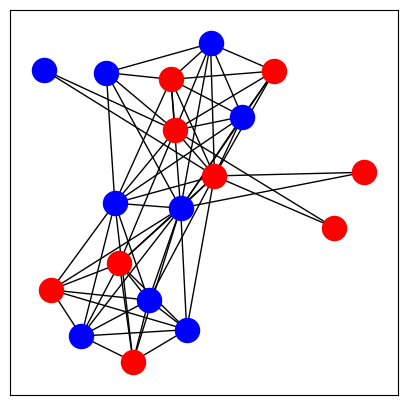

In [9]:
rand2_1 = [i for i in range(1, 19) if i%2==0]
rand2_2= [i for i in range(1, 19) if i%2==1]
viz(rand2_1,rand2_2,G)

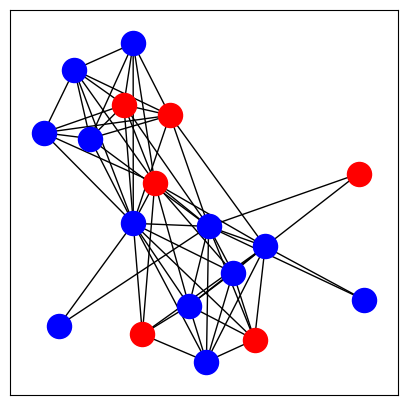

In [10]:
rand3_1 = [i for i in range(1, 19) if i%3==0]
rand3_2 = [i for i in range(1, 19) if i%3!=0]
viz(rand3_1,rand3_2,G)

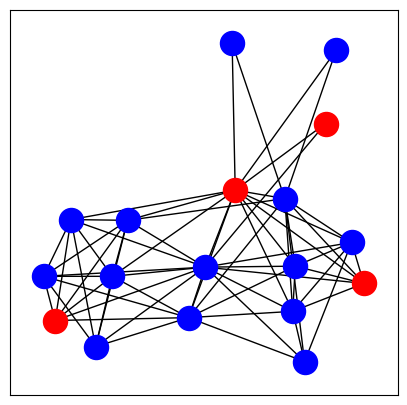

In [11]:
rand4_1 = [i for i in range(1, 19) if i%4==0]
rand4_2 = [i for i in range(1, 19) if i%4!=0]
viz(rand4_1, rand4_2,G)

<p class="task" id="2"></p>

2\. Для разбиений из предыдущей задачи посчитайте три величины: плотность первого сообщества, плотность второго сообщества и среднюю плотность сообществ (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x, y, z
```
где `x` - плотность первого сообщества, `y` - плотность второго сообщества, `z` - средняя плотность сообществ.

Посчитайте и выведите плотность сети без разбиения на сообществ:

```
Плотность сети: x
```

- [X] Проверено на семинаре

In [12]:
def calc(s1, s2, G):
    density_1 = nx.density(G.subgraph(s1))
    density_2= nx.density(G.subgraph(s2))
    avg_density = (density_1 + density_2) / 2
    return round(density_1, 2), round(density_2, 2), round(avg_density, 2)

In [13]:
parts = [(s1, s2), (rand1_1, rand1_2), (rand2_1, rand2_2), (rand3_1, rand3_2), (rand4_1, rand4_2)]

In [14]:
for i, (s1, s2) in enumerate(parts):
    density_s1, density_s2, avg_density = calc(s1, s2, G)
    print(f"Разбиение {i}: {density_s1}, {density_s2}, {avg_density}")

Разбиение 0: 0.55, 0, 0.28
Разбиение 1: 0.86, 0.42, 0.64
Разбиение 2: 0.36, 0.44, 0.4
Разбиение 3: 0.2, 0.42, 0.31
Разбиение 4: 0.33, 0.43, 0.38


In [15]:
G_density = nx.density(G)
print(f"Плотность сети: {round(G_density, 2)}")



Плотность сети: 0.42


<p class="task" id="3"></p>

3\. Для разбиений из первой задачи посчитайте модулярность (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x
```
где `x` - мера модулярности для разбиения `i`.

Посчитайте и выведите модулярность в случае разделения узлов на одно сообщество:

```
Модулярность разбиения с одним сообществом: x
```

- [ ] Проверено на семинаре

In [16]:
for i, partition in enumerate(parts, 1):
    mod = nx.community.modularity(G, partition)
    print(f"Разбиение {i}: {mod:.2f}")

Разбиение 1: -0.00
Разбиение 2: 0.17
Разбиение 3: -0.05
Разбиение 4: -0.09
Разбиение 5: -0.03


In [17]:
single_mod = nx.community.modularity(G, [list(G.nodes)])
print(f"Модулярность разбиения с одним сообществом: {single_mod:.2f}")

Модулярность разбиения с одним сообществом: 0.00


<p class="task" id="4"></p>

4\. Для разбиений из первой задачи посчитайте метрики покрытия (coverage) и эффективности (performance). (округлите значения до сотых). Выведите результаты в следующей виде:

```
Разбиение i: x, y
```
где `x` - значение метрики покрытия для разбиения `i`, `y` - значение метрики эффективности для разбиения `i`.

- [ ] Проверено на семинаре

In [18]:
from networkx.algorithms.community.quality import partition_quality

In [20]:
for i, partition in enumerate(parts, 1):
    quality = partition_quality(G, partition)
    cov = quality[0]
    perf = quality[1]
    print(f"Разбиение {i}: {cov:.2f}, {perf:.2f}")


Разбиение 1: 0.91, 0.63
Разбиение 2: 0.67, 0.67
Разбиение 3: 0.45, 0.49
Разбиение 4: 0.48, 0.46
Разбиение 5: 0.64, 0.48


<p class="task" id="5"></p>

5\. Вычислите значение центральности по посредничеству для всех узлов сети. Выделите множество узлов $C_0$, центральность по посредничеству для которых строго больше, чем среднее значение центральности для всех узлов графа. Удалите узлы множества $C_0$ из графа и выделите компоненты связности $C_1, ...C_k$. Выведите полученные компоненты связности на экран.

Восстановите исходный граф со всеми узлами. Трактуя множества $C_0, ... C_k$ как сообщества, посчитайте значения модулярности, покрытия и эффективности для такого разбиения. Выведите полученные значения на экран.

Визуализируйте граф, раскрасив узлы в цвет сообществующего им сообщества.

- [ ] Проверено на семинаре

In [94]:
centrality = nx.betweenness_centrality(G)
centrality

{1: 0.011939775910364143,
 2: 0.0022759103641456584,
 3: 0.014215686274509802,
 4: 0.0022759103641456584,
 5: 0.0035014005602240893,
 6: 0.03631827731092437,
 7: 0.20919117647058824,
 8: 0.22367822128851544,
 9: 0.07724964985994397,
 10: 0.008394607843137255,
 11: 0.005698529411764705,
 12: 0.0009191176470588235,
 13: 0.0036151960784313727,
 14: 0.09711134453781513,
 15: 0.0021446078431372547,
 16: 0.0,
 17: 0.0,
 18: 0.0}

In [96]:
mean_centr = sum(centrality.values()) / len(centrality)
mean_centr

0.03880718954248367

In [97]:
C_0 = {node for node, c in centrality.items() if c > mean_centr}
C_0

{7, 8, 9, 14}

In [98]:
G_copy = G.copy()
G_copy.remove_nodes_from(C_0)
part = list(nx.connected_components(G_copy))

for i, component in enumerate(part, 1):
    print(f"C_{i}: {component}")

C_1: {1, 2, 3, 4, 5, 6}
C_2: {10, 11, 12, 13, 15}
C_3: {16}
C_4: {17}
C_5: {18}


In [99]:
G_copy = G.copy()

In [103]:
parts = [set(C_0)]
parts.extend(part)

In [104]:
parts

[{7, 8, 9, 14}, {1, 2, 3, 4, 5, 6}, {10, 11, 12, 13, 15}, {16}, {17}, {18}]

In [105]:
mod= nx.community.modularity(G_copy, parts)
cov = partition_quality(G, parts)[0]
perf = partition_quality(G, parts)[1]

In [106]:
print(f"Модулярность: {mod:.2f}")
print(f"Покрытие: {cov:.2f}")
print(f"Эффективность: {perf:.2f}")

Модулярность: 0.11
Покрытие: 0.42
Эффективность: 0.73


In [107]:
pos = nx.spring_layout(G)
colors = ['r', 'g', 'b', 'c', 'm', 'y']

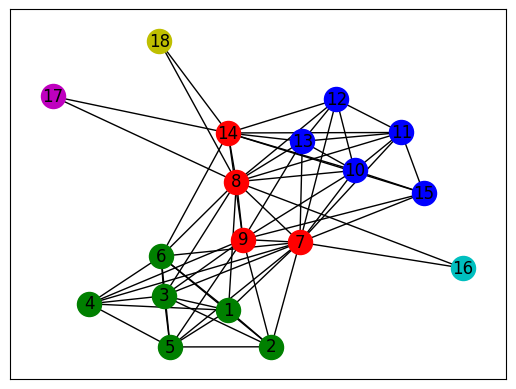

In [108]:
for idx, comm_nodes in enumerate(parts):
    nx.draw_networkx_nodes(G, pos, nodelist=comm_nodes, node_color=colors[idx])

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()
